In [36]:
# For data manipulation
import pandas as pd

# for scientific computation
import numpy as np

# for data analysis
from sklearn import linear_model
import sklearn.metrics as sm

# for diagramming 
import matplotlib.pyplot as plt

# For serialization and deserialization of data from/to file
import pickle

In [37]:
#Import the china gdp data
df = pd.read_csv("../../../../soft2022spring-DS/Data/china_gdp.csv")
df.tail()

,Year,Value
50,2010,6.039659e+12
51,2011,7.492432e+12
52,2012,8.461623e+12
53,2013,9.490603e+12
54,2014,1.035483e+13


In [38]:
df.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


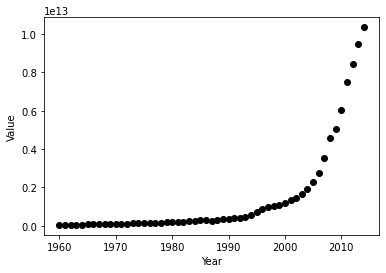

In [39]:
#Visualize the raw data
x, y = df["Year"], df["Value"]
plt.xlabel('Year')
plt.ylabel('Value')
plt.scatter(x, y, color='black')
plt.show()

In [78]:
#Define the model
a,b = np.polyfit(x, np.exp(x), 1)

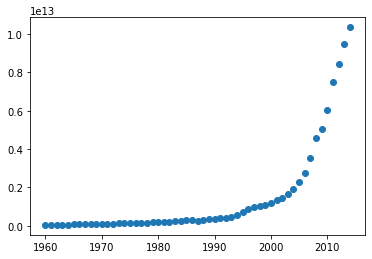

In [76]:
plt.scatter(x,y)
plt.plot([1960, df["Year"].max()],[x,np.exp(x)])